# Dataset exploration style

In [6]:
#imports
import sys
sys.path.append('/home/elenaruiz/Documents/FNC')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import io
from src.fake_news_detector.core.nlp import clean_text as ct
from src.fake_news_detector.core.data_process import exploration as eh

## Import style dataset

In [7]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/dataset_style.json')
df = pd.DataFrame(data=articles['articles'])

## Exploration

In [8]:
df.head()

,fake,mean_character_per_word,mean_words_per_sentence,n_sentences,n_words,pert_different_words,pert_total_adj,pert_total_conj_prep,pert_total_negative_words,pert_total_nouns,pert_total_positive_words,pert_total_verbs,sentiment,title_n_words,title_pert_total_conj_prep,title_pert_total_negative_words,title_pert_total_positive_words,title_sentiment
0,True,6.096296,19.285714,7,135,0.696296,0.170370,0.007407,0.074074,0.607407,0.007407,0.170370,-0.426929,5,0.007407,0.200000,0.000000,-0.5719
1,True,6.688525,45.750000,4,183,0.622951,0.185792,0.000000,0.032787,0.612022,0.027322,0.114754,0.232350,6,0.000000,0.000000,0.000000,-0.1027
2,True,5.896552,10.545455,11,116,0.818966,0.181034,0.000000,0.051724,0.594828,0.060345,0.120690,0.016064,8,0.000000,0.125000,0.000000,-0.4588
3,True,5.363636,13.200000,5,66,0.772727,0.196970,0.000000,0.075758,0.439394,0.090909,0.181818,0.177140,6,0.000000,0.166667,0.166667,-0.2023
4,True,6.454545,16.500000,4,66,0.818182,0.151515,0.030303,0.075758,0.636364,0.060606,0.121212,-0.023350,7,0.030303,0.142857,0.000000,-0.4767


## Correlations

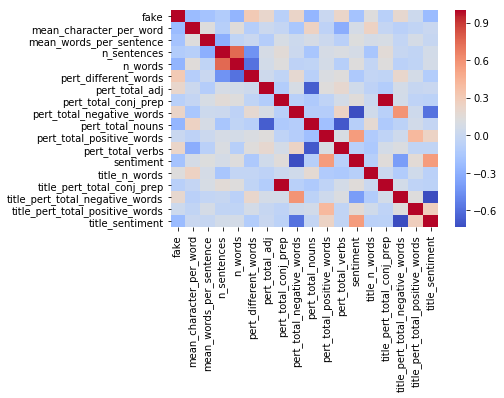

In [10]:
table = df.corr()
sns.heatmap(table, cmap='coolwarm')

No se obserban grandes correlaciones que muestre desde el primer momento una buena classificación. Todo y así las features más correlacionadas con el label `fake` siendo su valor mayor a 0.2 son las que se muestran a continuación.

In [11]:
table['fake_abs'] = table['fake'].abs()
sort_table = table.sort_values(by=['fake_abs'],  ascending=False)
top_correlation = sort_table[(sort_table['fake_abs'] > 0.20)].fake_abs
top_correlation

fake                         1.000000
pert_different_words         0.309559
n_words                      0.270078
pert_total_nouns             0.263984
title_sentiment              0.230889
mean_character_per_word      0.228940
pert_total_negative_words    0.227759
pert_total_verbs             0.225057
pert_total_adj               0.211848
Name: fake_abs, dtype: float64

También observamos si existe correlación entre las features mencionadas con tal de buscar la mayor independencia entre features diferentes a nuestro label.

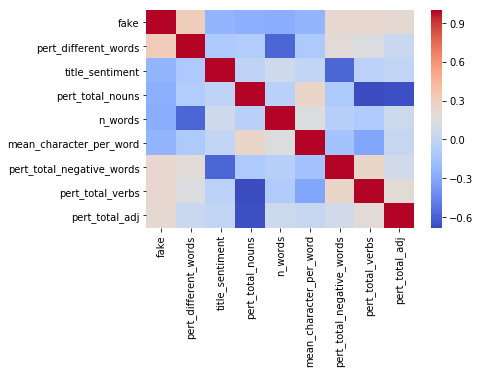

In [13]:
names = ['fake', 'pert_different_words', 'title_sentiment', 'pert_total_nouns', 'n_words', 'mean_character_per_word', 'pert_total_negative_words', 'pert_total_verbs', 'pert_total_adj' ]
sub_df = df[names]
sub_table = sub_df.corr()
sns.heatmap(sub_table, cmap='coolwarm')

En esta tabla de correlaciones se puede observar una considerable correlación entre las siguientes features:
- pert_total_verbs + pert_total_nouns
- n_words + pert_different_words

En los dos casos són datos coherentes, y en los dos casos nos quedaremos para explorar el comportamiendo, las variables más correlacionadas con nuestro label:
- pert_total_nouns
- n_words

Quedando así la tabla correlaciones:

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


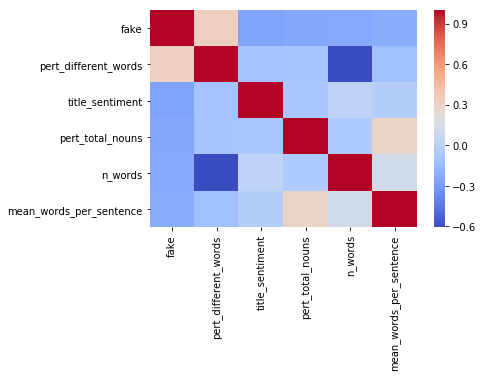

In [7]:
names =  ['fake', 'pert_different_words', 'title_sentiment', 'pert_total_nouns', 'n_words', 'mean_words_per_sentence' ]
dataset = df[names]
dataset['fake'] = df['fake']*1
sns.heatmap(dataset.corr(), cmap='coolwarm')

### Normalize

Para poder visualizar el comportamiento de cada uno de la mejor manera estandarizamos los datos

In [8]:
from sklearn.preprocessing import StandardScaler
names = dataset.columns
x = dataset.values

In [9]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=names)

### Exploration
For each feature: 
- Explore histogram difference between real and fake
- Split in three levels
- See correlation with FAKE

So, first, we split out dataset by fake value in order to compare the values of each feature:

In [10]:
fake_df = dataset.loc[dataset['fake'] == 1]
real_df = dataset.loc[dataset['fake'] == 0]

In [11]:
def print_results(labels, real_res, fake_res):
    print('FAKE NEWS')
    print(labels[0], 'Pert:', str(100*fake_res[0]))
    print(labels[1], 'Pert:', str(100*fake_res[1]))
    print(labels[2], 'Pert:', str(100*fake_res[2]), '\n')

    print('REAL NEWS')
    print(labels[0], 'Pert:', str(100*real_res[0]))
    print(labels[1], 'Pert:', str(100*real_res[1]))
    print(labels[2], 'Pert:', str(100*real_res[2]), '\n')

    print('DIFFERENCE NEWS')
    print(labels[0], str(100*(fake_res[0] - real_res[0])))
    print(labels[1], str(100*(fake_res[1] - real_res[1])))
    print(labels[2], str(100*(fake_res[2] - real_res[2])), '\n')

### pert_different_words

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


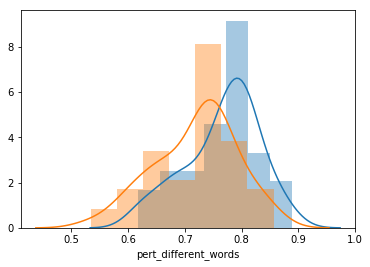

In [12]:
sns.distplot(fake_df['pert_different_words']);
sns.distplot(real_df['pert_different_words']);

In [13]:
fake, real = eh.split_in_three(fake_df['pert_different_words'], real_df['pert_different_words'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)


FAKE NEWS
A lot Pert: 21.568627450980394
Middle Pert: 58.82352941176471
A bit Pert: 19.607843137254903 

REAL NEWS
A lot Pert: 58.06451612903226
Middle Pert: 35.483870967741936
A bit Pert: 6.451612903225806 

DIFFERENCE NEWS
A lot -36.49588867805187
Middle 23.33965844402277
A bit 13.156230234029096 



### title_sentiment

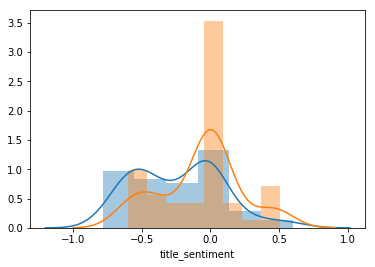

In [14]:
sns.distplot(fake_df['title_sentiment']);
sns.distplot(real_df['title_sentiment']);

In [15]:
fake, real = eh.split_in_three(fake_df['title_sentiment'], real_df['title_sentiment'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 13.725490196078432
Middle Pert: 64.70588235294117
A bit Pert: 21.568627450980394 

REAL NEWS
A lot Pert: 9.67741935483871
Middle Pert: 48.38709677419355
A bit Pert: 41.935483870967744 

DIFFERENCE NEWS
A lot 4.048070841239723
Middle 16.31878557874763
A bit -20.36685641998735 



### pert_total_nouns

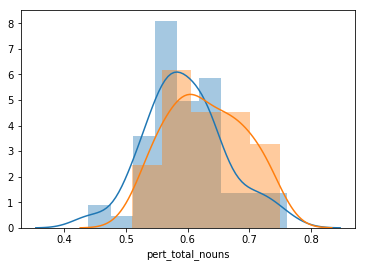

In [16]:
sns.distplot(fake_df['pert_total_nouns']);
sns.distplot(real_df['pert_total_nouns']);

In [17]:
fake, real = eh.split_in_three(fake_df['pert_total_nouns'], real_df['pert_total_nouns'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 37.254901960784316
Middle Pert: 52.94117647058824
A bit Pert: 9.803921568627452 

REAL NEWS
A lot Pert: 14.516129032258066
Middle Pert: 67.74193548387096
A bit Pert: 17.741935483870968 

DIFFERENCE NEWS
A lot 22.73877292852625
Middle -14.800759013282727
A bit -7.938013915243518 



### n_words

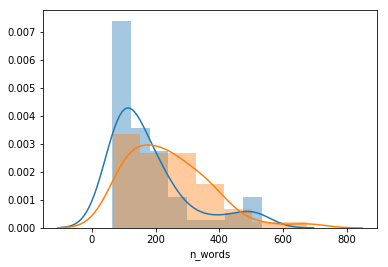

In [18]:
sns.distplot(fake_df['n_words']);
sns.distplot(real_df['n_words']);

In [19]:
fake, real = eh.split_in_three(fake_df['n_words'], real_df['n_words'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 3.9215686274509802
Middle Pert: 29.411764705882355
A bit Pert: 66.66666666666666 

REAL NEWS
A lot Pert: 6.451612903225806
Middle Pert: 9.67741935483871
A bit Pert: 83.87096774193549 

DIFFERENCE NEWS
A lot -2.530044275774826
Middle 19.734345351043643
A bit -17.204301075268823 



### mean_words_per_sentence

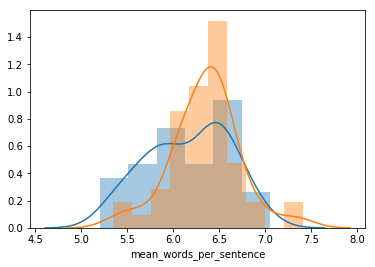

In [20]:
sns.distplot(fake_df['mean_words_per_sentence']);
sns.distplot(real_df['mean_words_per_sentence']);

In [21]:
fake, real = eh.split_in_three(fake_df['mean_words_per_sentence'], real_df['mean_words_per_sentence'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 13.725490196078432
Middle Pert: 76.47058823529412
A bit Pert: 9.803921568627452 

REAL NEWS
A lot Pert: 14.516129032258066
Middle Pert: 51.61290322580645
A bit Pert: 33.87096774193548 

DIFFERENCE NEWS
A lot -0.7906388361796329
Middle 24.85768500948766
A bit -24.067046173308032 



## Conclusions